In [1]:
%config InlineBackend.figure_format = 'png'

# 회귀 분석용 샘플 데이터 소개

In [3]:
# 보스턴 주택 가격 데이터
from sklearn.datasets import load_boston
boston = load_boston()
#print(boston.DESCR)
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


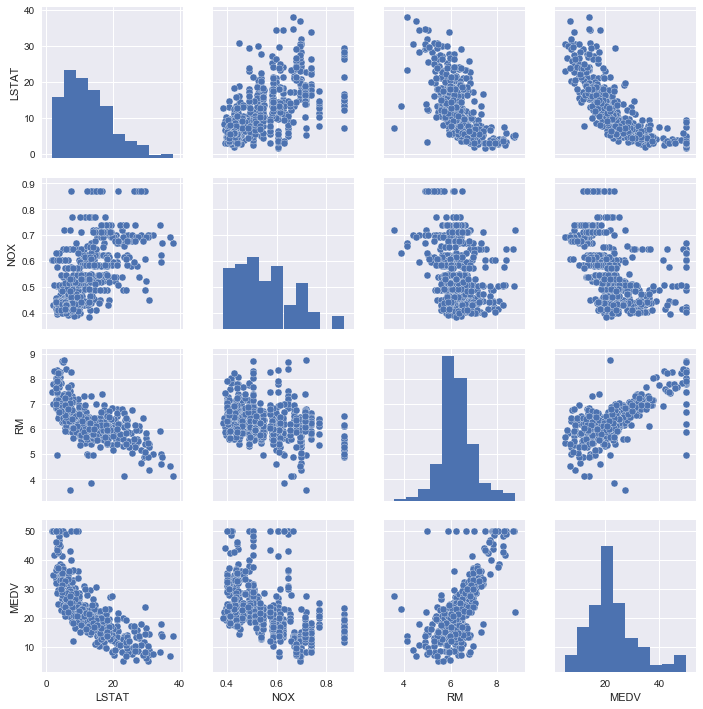

In [5]:
cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()

# 회귀분석용 가상 데이터 생성 방법

`make_regression()` Scikit-learn의 datasets 서브 패키지는 회귀분석용 가상 데이터를 생성하는 명령어


**$y$** : 종속 변수

** $x$ **: 독립 변수로 $y$와 벡터의 선형 조합인 선형관계를 가진다.

**$b$** : y절편 즉, 바이어스(bias) 값

**$\epsilon$** : 오차(disturbance), 보통 **기댓값이 0인 정규 분포 확률 변수로 가정**한다.

$$ y = b + w^Tx + \epsilon $$ 

위 식에서 $x$, $w$는 $M$차원 벡터($M$은 입력 차원)  $y$, $b$, $\epsilon$는 모두 스칼라 값이다.

복수의 데이터에 대해서는 다음처럼 쓸 수 있다.

$$ y = b\mathbf{1} + Xw + \epsilon $$ 

이 경우에는 $y$는 $N$차원 벡터($N$은 데이터의 갯수), $X$는 $N\times M$차원 행렬($M$은 입력 차원), $w$는 $M$차원 벡터, $\epsilon$는 $N$차원 벡터, $\mathbf{1}$는 $N$차원 1-벡터이다.

```
X, y = make_regression(...)
```
또는
```
X, y, w = make_regression(..., coef=True, ...)
```

In [6]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0)

In [7]:
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [8]:
y

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [9]:
w

array(79.17250381)

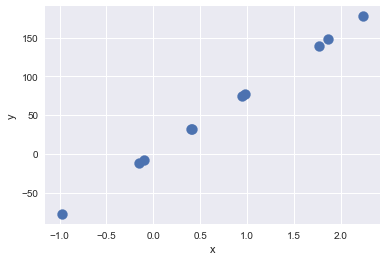

In [10]:
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

위 코드를 실행하여 나온 선형 모형은 다음과 같다.

$$
y = 79.1725 x 
$$
`noise` 인수를 증가시키면  $\text{Var}[\epsilon]$가 증가하고 `bias` 인수를 증가시키면 y 절편 $b$가 증가한다.

## Make make_regression

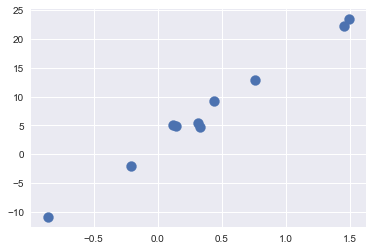

(array([ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574]),
 array([  4.82896429,  22.24764601,  12.88846396,   4.98514456,
          9.23048335,   4.8060533 ,  23.3682031 ,  -2.09236836,
          5.38470957, -10.8331447 ]),
 14.33532874090464)

In [13]:
import scipy as sp
def make_regression2(n_samples, bias, noise, random_state):
    np.random.seed(random_state)    
    rv = sp.stats.norm(0, noise)    
    e = rv.rvs(n_samples)     
    x = np.random.randn(n_samples)
    w = np.random.rand()*100
    y =  bias + x.T*w + e
    
    plt.scatter(x, y, s=100)
    plt.show()
    return x, y, w
make_regression2(10,1,1,0) 

#### 이번에는 n_features 즉, 독립 변수가 2개인 표본 데이터를 생성하여 스캐터 플롯을 그리면 다음과 같다. 종속 변수 값은 점의 명암으로 표시하였다.



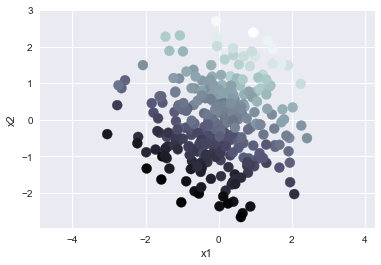

In [17]:
X, y, w = make_regression(n_samples=300, n_features=2, noise=10, 
                          coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

X가 [300 by 2]이다

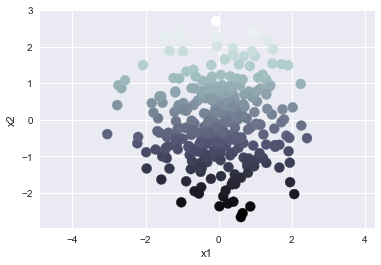

In [27]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, 
                          noise=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

* `n_informative` : 정수 (옵션, 디폴트 10)
    * 독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
    
x1만 독립변수가 되었다  
    

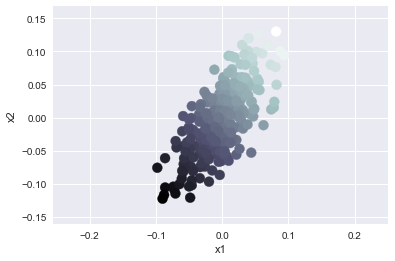

In [24]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, 
                          tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

* `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    * `effective_rank`가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없다.